In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\momina\.conda\envs\pythonadv\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Read the CSV and Perform Basic Data Cleaning

In [3]:
# Import Dependancies

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error




In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features = df[['koi_disposition', 'koi_period', 'koi_time0bk', 'koi_slogg', 'koi_srad','ra','dec','koi_kepmag']]
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
# Check dependant variable unique value
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [7]:
#Use lable encoding for dependant variable

le = preprocessing.LabelEncoder()
df['koi_disposition'] = le.fit_transform(df['koi_disposition'])

In [8]:
#Display df
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [9]:
 print(df. columns)

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


In [10]:
print(df.describe())

       koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
count      6991.000000    6991.000000    6991.000000    6991.000000   
mean          1.259906       0.157059       0.244743       0.202975   
std           0.821628       0.363882       0.429966       0.402243   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       0.000000       0.000000       0.000000   
50%           2.000000       0.000000       0.000000       0.000000   
75%           2.000000       0.000000       0.000000       0.000000   
max           2.000000       1.000000       1.000000       1.000000   

       koi_fpflag_ec   koi_period  koi_period_err1  koi_period_err2  \
count    6991.000000  6991.000000     6.991000e+03     6.991000e+03   
mean        0.125018    56.191248     1.851122e-03    -1.851122e-03   
std         0.330763   117.570962     7.184503e-03     7.184503e-03   
min         0.000000     0.259820     1.100000e-08    -1.568000e-01   
25%  

# Pre-processing

Scale the data using the MinMaxScaler OR StandardScaler (per Gretel HW tip session) and perform some feature selection

In [11]:
# Assign X (data / features) and y (target)
# (X is always a matrix, so it is capital; y is always a vector, so it is lowercase)

### BEGIN SOLUTION
X = df[['koi_period', 'koi_time0bk', 'koi_slogg', 'koi_srad','ra','dec','koi_kepmag']]
y = df["koi_disposition"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(6991, 7) (6991, 1)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
# Split the data into training and testing
# Default split is 80% testing, 20% training
# Setting random_state is not necessary but makes results reproducible

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [13]:
# Create a StandardScater model and fit it to the training data
# StandardScaler makes data normally distributed

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [14]:
X_train.head(15)

,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,6.768901,133.077240,4.327,1.125,294.40472,39.351681,14.725
6370,0.733726,132.020050,4.578,0.797,284.50391,42.463860,15.770
2879,7.652707,134.460380,4.481,0.963,295.50211,38.983540,13.099
107,7.953547,174.662240,4.536,0.779,291.15878,40.750271,15.660
29,4.959319,172.258529,4.359,1.082,292.16705,48.727589,15.263
6291,45.433249,159.870473,4.359,1.080,297.38031,47.545029,14.774
5193,78.866840,143.731400,4.264,1.381,289.03772,49.712601,12.914
2505,19.193104,176.966757,4.530,0.892,296.24954,42.335480,14.847
2984,7.298142,137.856740,4.508,0.834,291.39938,38.787750,15.825
2699,7.751928,176.171970,4.520,0.912,292.15045,39.637581,13.307


In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [16]:
# Create the model using the Sklearn LinearRegression model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
# Fit model to scaled training data
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [18]:
# StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. 
# We can see the difference in the following plots.

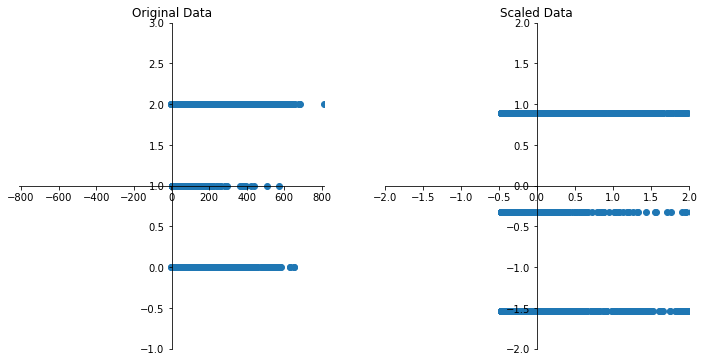

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["koi_period"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["koi_period"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [20]:
plt.show()

# Train the Model



In [21]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: -2.3148304633526124
Testing Data Score: -2.342545984915907


In [22]:
# Calculate metrics to determine quality of model
# Includes:

# MSE
# R2
# Confusion Matrix
# Classification Report

In [23]:
# Calculate R2 value on test data - default score for Linear Regression in sklearn
r2 = model.score(X_test_scaled, y_test_scaled)

# Calculate MSE on test data
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)

print(f"Linear Regression MSE: {MSE}, R2: {r2}")

Linear Regression MSE: 0.9434798994822639, R2: 0.0263946174118056


In [24]:
# Create and Fit Lasso Model
# Lasso, Ridge, and ElasticNet can 
# often be better alternatives in situations where you would use linear regression to prevent overfitting.

In [25]:
# Instantiate model
lasso = Lasso(alpha=.01)

# Fit model to scaled training data
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.01)

In [26]:
# Calculate metrics to determine quality of model

In [27]:
# Calculate R2 value on test data - default score for Lasso in sklearn
l_r2 = lasso.score(X_test_scaled, y_test_scaled)

# Calculate MSE on test data
predictions = lasso.predict(X_test_scaled)
l_MSE = mean_squared_error(y_test_scaled, predictions)

print(f"Lasso MSE: {l_MSE}, R2: {l_r2}")

Lasso MSE: 0.9456506730038898, R2: 0.024154530700689958


In [28]:
# Create and Fit Ridge Model

In [29]:
# Instantiate model
ridge = Ridge(alpha=.01)

# Fit model to scaled training data
ridge.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=0.01)

In [30]:
# Calculate metrics to determine quality of model

In [31]:
# Calculate R2 value on test data - default score for Ridge in sklearn
r_r2 = ridge.score(X_test_scaled, y_test_scaled)

# Calculate MSE on test data
predictions = ridge.predict(X_test_scaled)
r_MSE = mean_squared_error(y_test_scaled, predictions)

print(f"Ridge MSE: {r_MSE}, R2: {r_r2}")

Ridge MSE: 0.9434799015304657, R2: 0.026394615298204305


In [32]:
# Create and Fit ElasticNet Model

In [33]:
# Instantiate model
elasticnet = ElasticNet(alpha=.01)

# Fit model to scaled training data
elasticnet.fit(X_train_scaled, y_train_scaled)

ElasticNet(alpha=0.01)

In [34]:
## Calculate metrics to determine quality of model

In [35]:
# Calculate R2 value on test data - default score for Ridge in sklearn
en_r2 = elasticnet.score(X_test_scaled, y_test_scaled)

# Calculate MSE on test data
predictions = elasticnet.predict(X_test_scaled)
en_MSE = mean_squared_error(y_test_scaled, predictions)

print(f"ElasticNet MSE: {en_MSE}, R2: {en_r2}")

ElasticNet MSE: 0.9442725687599838, R2: 0.025576638061292845


In [36]:
# Compare metrics to determine best model

In [37]:
print(f"Linear Regression MSE   : {MSE}, R2: {r2}")
print(f"Lasso MSE               : {l_MSE}, R2: {l_r2}")
print(f"Ridge MSE               : {r_MSE}, R2: {r_r2}")
print(f"ElasticNet MSE          : {en_MSE}, R2: {en_r2}")

Linear Regression MSE   : 0.9434798994822639, R2: 0.0263946174118056
Lasso MSE               : 0.9456506730038898, R2: 0.024154530700689958
Ridge MSE               : 0.9434799015304657, R2: 0.026394615298204305
ElasticNet MSE          : 0.9442725687599838, R2: 0.025576638061292845


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

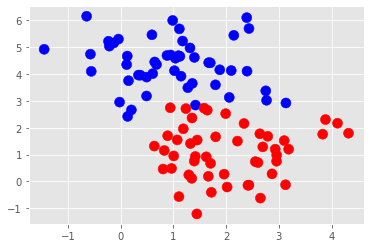

In [39]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [40]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [41]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [42]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.505, total=  54.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.506, total=  52.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.505, total= 1.1min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.506, total=  54.9s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.505, total=  56.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.505, total=  56.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.506, total=  54.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.505, total= 1.1min
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.506, total=  54.9s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.509, total= 2.4min
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.522, total= 2.4min
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.538, total= 2.7min
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.511, total= 2.6min
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.526, total= 2.2min
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.509, total= 2.3min
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.522, total= 2.2min
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 135.6min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [44]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.5218375915994149


In [45]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [47]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red", "green"]))

              precision    recall  f1-score   support

        blue       0.00      0.00      0.00       411
         red       0.44      0.20      0.27       484
       green       0.51      0.92      0.66       853

    accuracy                           0.50      1748
   macro avg       0.32      0.37      0.31      1748
weighted avg       0.37      0.50      0.40      1748



# Save the Model

In [48]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Aslam_Best_Model_HW21.sav'
joblib.dump(model, filename)

['Aslam_Best_Model_HW21.sav']